In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
file_path = '/Users/kanaha/statistics/SSDSE-D-2023.xlsx'
df = pd.read_excel(file_path)
print(df.head())

  SSDSE-D-2023   2021年 Prefecture         MA00           MB00  MB01 MB011  \
0         男女の別   地域コード       都道府県  推定人口（10歳以上）  学習・自己啓発・訓練の総数   外国語    英語   
1         0_総数  R00000         全国       112462           39.6  14.1  12.8   
2         0_総数  R01000        北海道         4614             35  11.1   9.9   
3         0_総数  R02000        青森県         1090           25.4   7.4   6.6   
4         0_総数  R03000        岩手県         1075           28.9   7.7   7.1   

      MB012             MB02        MB021  ... MG20   MG51 MG52 MG53  \
0  英語以外の外国語  商業実務・ビジネス関係(総数)  パソコンなどの情報処理  ...  その他  通勤・通学   仕事   学業   
1       4.2             20.1         16.5  ...   16     79  340  393   
2       3.3               17         14.1  ...   15     64  343  391   
3         2             12.7         10.3  ...   12     61  370  423   
4       2.4             12.8         10.3  ...   17     63  362  472   

       MH01      MH02      MH03      MH04      MH51       MH52  
0        起床      朝食開始      夕食開始        

In [3]:
# Excelファイルを読み込む際に、ヘッダーを2行目（インデックス1）にする
df = pd.read_excel(file_path, header=1)
#２列目を削除する
df = df.drop(df.columns[1], axis=1)

print(df.head())

   男女の別 都道府県  推定人口（10歳以上）  学習・自己啓発・訓練の総数   外国語    英語  英語以外の外国語  \
0  0_総数   全国       112462           39.6  14.1  12.8       4.2   
1  0_総数  北海道         4614           35.0  11.1   9.9       3.3   
2  0_総数  青森県         1090           25.4   7.4   6.6       2.0   
3  0_総数  岩手県         1075           28.9   7.7   7.1       2.4   
4  0_総数  宮城県         2065           37.5  12.4  10.9       4.0   

   商業実務・ビジネス関係(総数)  パソコンなどの情報処理  商業実務・ビジネス関係  ...  その他.4  通勤・通学.1  仕事.1  学業.1  \
0             20.1         16.5          8.5  ...     16       79   340   393   
1             17.0         14.1          6.7  ...     15       64   343   391   
2             12.7         10.3          5.2  ...     12       61   370   423   
3             12.8         10.3          5.4  ...     17       63   362   472   
4             18.9         16.0          7.4  ...     16       73   352   395   

         起床      朝食開始      夕食開始        就寝        出勤  仕事からの帰宅時間  
0  06:38:00  07:11:00  18:58:00  23:04:00  08:20:00

## 仕事の都道府県別の男女比較

In [12]:
df_selected = df[['男女の別', '都道府県', '仕事']].copy()

df_selected['仕事'] = pd.to_numeric(df_selected['仕事'], errors='coerce')


都道府県別の男女別仕事時間（平均）:

仕事時間の差 (男 - 女):
男女の別   0_総数    1_男    2_女  差 (男 - 女)
都道府県                                
愛知県   214.0  286.0  143.0      143.0
滋賀県   206.0  277.0  137.0      140.0
千葉県   209.0  276.0  142.0      134.0
奈良県   189.0  256.0  129.0      127.0
群馬県   209.0  272.0  146.0      126.0
埼玉県   200.0  263.0  138.0      125.0
広島県   203.0  267.0  143.0      124.0
宮城県   213.0  276.0  153.0      123.0
神奈川県  206.0  268.0  145.0      123.0
山形県   219.0  280.0  161.0      119.0
栃木県   221.0  281.0  162.0      119.0
京都府   186.0  248.0  130.0      118.0
静岡県   205.0  265.0  147.0      118.0
三重県   203.0  263.0  145.0      118.0
北海道   199.0  260.0  143.0      117.0
兵庫県   199.0  260.0  143.0      117.0
山梨県   217.0  276.0  160.0      116.0
秋田県   200.0  261.0  146.0      115.0
福岡県   203.0  264.0  149.0      115.0
全国    208.0  267.0  152.0      115.0
和歌山県  198.0  257.0  144.0      113.0
石川県   224.0  282.0  169.0      113.0
熊本県   205.0  263.0  152.0      111.0
愛媛県   198.0  256.0  145.0      111.0
大

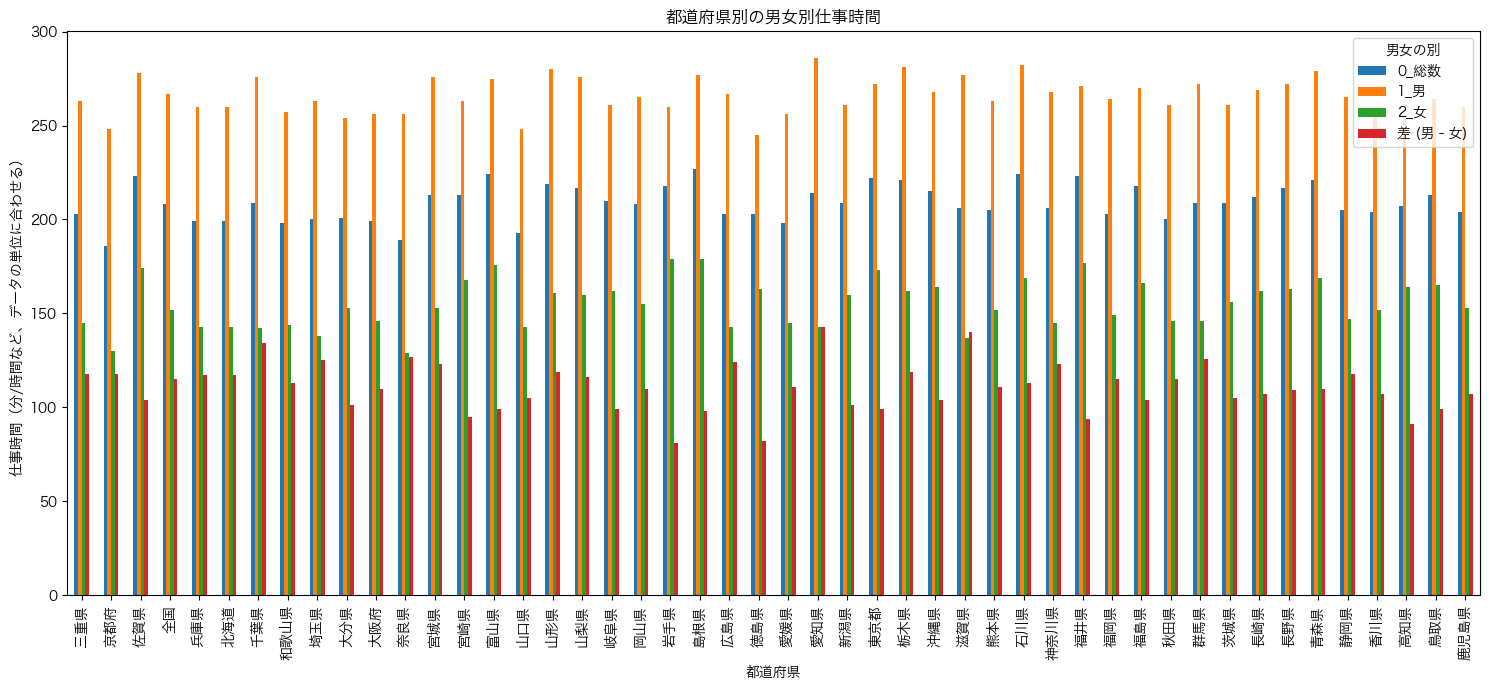

In [ ]:
plt.rcParams['font.family'] = 'Hiragino Sans GB' # Macの場合の例
plt.rcParams['axes.unicode_minus'] = False # マイナス記号を正しく表示するため

df_selected = df[['男女の別', '都道府県', '仕事']].copy()

df_selected['仕事'] = pd.to_numeric(df_selected['仕事'], errors='coerce')

# ピボットテーブルを作成して、都道府県別に男女の仕事の時間を比較
pivot_df = df_selected.pivot_table(index='都道府県', columns='男女の別', values='仕事', aggfunc='mean')

# 結果を表示
print("\n都道府県別の男女別仕事時間（平均）:")
# 単純に都道府県別に男女の仕事の時間を比較したやつ
# print(pivot_df)

# 必要であれば、さらに詳細な分析や可視化を行うことができます。
# 例: 男性の仕事時間が女性より長い都道府県を特定
if '1_男' in pivot_df.columns and '2_女' in pivot_df.columns:
    pivot_df['差 (男 - 女)'] = pivot_df['1_男'] - pivot_df['2_女']
    print("\n仕事時間の差 (男 - 女):")
    # ここで差を計算して、男性の仕事時間が女性より長い都道府県を特定
    print(pivot_df.sort_values(by='差 (男 - 女)', ascending=False))


pivot_df.plot(kind='bar', figsize=(15, 7))
plt.title('都道府県別の男女別仕事時間')
plt.xlabel('都道府県')
plt.ylabel('仕事時間（分/時間など、データの単位に合わせる）')
plt.xticks(rotation=90)
plt.legend(title='男女の別')
plt.tight_layout()
plt.show()

### 分析考察
雇用形態: 男性がフルタイムでの雇用が主である一方、女性はパートタイムや短時間勤務を選択する割合が高い可能性があります。子育てや介護などの家庭内役割が女性に偏っている現状が背景にあるかもしれません。

産業構造: 男性が多く従事する産業（製造業、建設業など）が長時間労働の傾向にあるのに対し、女性が多く従事する産業（サービス業、医療・福祉など）は比較的短時間労働である可能性も考えられます。

比較的長時間: 佐賀県（総数 223.0）、富山県（総数 224.0）、福井県（総数 223.0）などは全体的に仕事時間が長い傾向にあります。特に富山県や福井県は男性の仕事時間も長く、女性の仕事時間も比較的長い部類に入ります。

比較的短時間: 京都府（総数 186.0）、奈良県（総数 189.0）、山口県（総数 193.0）などは全体的に仕事時間が短い傾向にあります。

産業構造の違い: 各都道府県の主要産業や経済状況が仕事時間に影響を与えている可能性があります。例えば、製造業が盛んな地域では長時間労働が一般的である一方、観光業やサービス業が中心の地域では勤務形態が多様であることも考えられます。

通勤・通学時間: データには含まれていませんが、通勤・通学時間が長い地域では、実質的な拘束時間が長くなり、それが仕事時間に影響を与える可能性もあります。

生活習慣・文化: 地域ごとの生活習慣やワークライフバランスに対する意識の違いも、仕事時間の差に影響しているかもしれません。

## 家事の都道府県別男女比較


都道府県別の男女別家事時間（平均）:

仕事時間の差 (女 - 男):
男女の別   0_総数   1_男    2_女  差 (女 - 男)
都道府県                               
奈良県   100.0  22.0  170.0      148.0
滋賀県    93.0  23.0  160.0      137.0
静岡県    92.0  26.0  158.0      132.0
長崎県    93.0  23.0  155.0      132.0
秋田県    95.0  26.0  158.0      132.0
三重県    91.0  25.0  156.0      131.0
和歌山県   95.0  26.0  157.0      131.0
京都府    94.0  26.0  157.0      131.0
兵庫県    89.0  21.0  150.0      129.0
愛知県    86.0  22.0  151.0      129.0
山口県    92.0  25.0  153.0      128.0
岡山県    91.0  26.0  152.0      126.0
愛媛県    93.0  27.0  153.0      126.0
千葉県    87.0  24.0  150.0      126.0
埼玉県    91.0  28.0  153.0      125.0
茨城県    85.0  23.0  148.0      125.0
神奈川県   89.0  27.0  152.0      125.0
熊本県    88.0  23.0  147.0      124.0
栃木県    85.0  23.0  147.0      124.0
宮崎県    89.0  24.0  147.0      123.0
岐阜県    88.0  25.0  148.0      123.0
青森県    83.0  19.0  141.0      122.0
長野県    91.0  29.0  151.0      122.0
福岡県    84.0  21.0  142.0      121.0
徳島県    87.0  24.0  145.0   

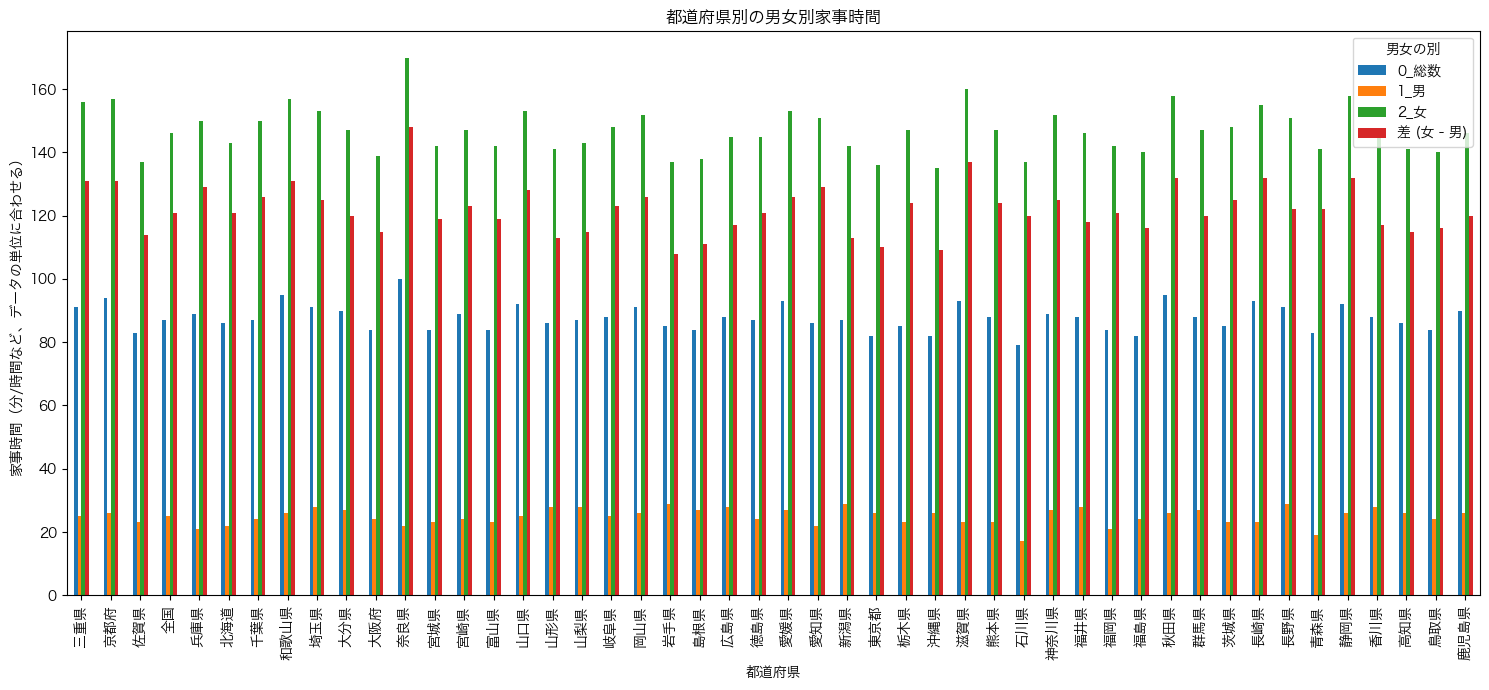

In [27]:
df_selected = df[['男女の別', '都道府県', '家事']].copy()

df_selected['家事'] = pd.to_numeric(df_selected['家事'], errors='coerce')

# # NaN値がある行を削除するか、適切に処理する
# # 今回は比較のため、NaNがある行は削除するのが良いでしょう
# df_selected.dropna(subset=['仕事'], inplace=True)

# 男女別の仕事の時間を都道府県ごとに集計
# '男女の別' 列の値が '1_男' と '2_女' であると仮定します。
# もし異なる値が入っている場合は、適宜修正してください。

# ピボットテーブルを作成して、都道府県別に男女の仕事の時間を比較
pivot_df = df_selected.pivot_table(index='都道府県', columns='男女の別', values='家事', aggfunc='mean')

# 結果を表示
print("\n都道府県別の男女別家事時間（平均）:")
# print(pivot_df)

# 必要であれば、さらに詳細な分析や可視化を行うことができます。
# 例: 男性の仕事時間が女性より長い都道府県を特定
if '2_女' in pivot_df.columns and '1_男' in pivot_df.columns:
    pivot_df['差 (女 - 男)'] = pivot_df['2_女'] - pivot_df['1_男']
    print("\n仕事時間の差 (女 - 男):")
    print(pivot_df.sort_values(by='差 (女 - 男)', ascending=False))

#グラフでの可視化の例 (matplotlibやseabornを使用)
import matplotlib.pyplot as plt
import seaborn as sns

pivot_df.plot(kind='bar', figsize=(15, 7))
plt.title('都道府県別の男女別家事時間')
plt.xlabel('都道府県')
plt.ylabel('家事時間（分/時間など、データの単位に合わせる）')
plt.xticks(rotation=90)
plt.legend(title='男女の別')
plt.tight_layout()
plt.show()

### 考察
社会的背景: この格差は、依然として根強く残る性別役割分担意識や、女性が主に家事・育児・介護といった無償労働を担うという社会構造を反映していると考えられます。男性の育児休業取得率の低さや、長時間労働が常態化している日本の企業文化も影響している可能性があります。

差が大きい都道府県: 奈良県 (148.0)、滋賀県 (137.0)、静岡県 (132.0)、長崎県 (132.0)、秋田県 (132.0) などは、女性が男性よりも家事をする時間の差が大きい地域です。

差が小さい都道府県: 沖縄県 (109.0)、東京都 (110.0)、島根県 (111.0)、岩手県 (108.0) などは、家事時間の男女差が比較的小さい地域です。

都市部と地方: 興味深いのは、東京都や沖縄県といった都市部や特殊な生活様式を持つ地域で差が小さい傾向が見られることです。これは、共働き世帯の割合が高い、核家族化が進んでいる、あるいは都市生活における家事サービス利用が進んでいるなどの要因が影響している可能性があります。

女性の就業率: 女性の就業率が高い地域では、家事分担への意識が高まり、男女間の家事時間の差が縮まる傾向があるかもしれません。

高齢化率: 高齢化が進む地域では、世帯構成や介護の負担が家事時間に影響を与える可能性も考えられます。

地域の文化・慣習: 地域に根ざした性別役割分担の意識の強弱が、家事時間の差に影響を与えている可能性も否定できません。

### 家事仕事時間からの考察
仕事時間の男女差が小さい地域 ＆ 家事時間の男女差が小さい地域:

もし両方の差が小さい都道府県があれば、その地域は男女間の役割分担が比較的均等に進んでいる可能性があります。例えば、共働きが一般的で、男性も積極的に家事・育児に参加する文化が根付いているのかもしれません。

東京都や沖縄県が家事時間の男女差が比較的小さかったことは、都市部での共働き率の高さや、より多様なライフスタイルが受け入れられている可能性を示唆します。


## 家事仕事時間の相関

--- 結合・整形されたデータフレームの先頭5行 ---
男女の別  0_総数_仕事  1_男_仕事  2_女_仕事  0_総数_家事  1_男_家事  2_女_家事
都道府県                                                  
三重県     203.0   263.0   145.0     91.0    25.0   156.0
京都府     186.0   248.0   130.0     94.0    26.0   157.0
佐賀県     223.0   278.0   174.0     83.0    23.0   137.0
兵庫県     199.0   260.0   143.0     89.0    21.0   150.0
北海道     199.0   260.0   143.0     86.0    22.0   143.0

--- 結合・整形されたデータフレームの列名 ---
Index(['0_総数_仕事', '1_男_仕事', '2_女_仕事', '0_総数_家事', '1_男_家事', '2_女_家事'], dtype='object', name='男女の別')

--- 都道府県間での仕事時間と家事時間の相関（ピアソン相関係数）---
  男性の仕事時間と家事時間の相関: -0.235
  女性の仕事時間と家事時間の相関: -0.720
  全体の仕事時間と家事時間の相関: -0.702

--- 選択された列間の相関行列 ---
男女の別       1_男_仕事    1_男_家事    2_女_仕事    2_女_家事   0_総数_仕事   0_総数_家事
男女の別                                                               
1_男_仕事   1.000000 -0.234769  0.356838 -0.291371  0.774368 -0.469722
1_男_家事  -0.234769  1.000000  0.038348  0.024128 -0.064064  0.273868
2_女_仕事   0.356838  0.038348  1.000000 -0.720460  

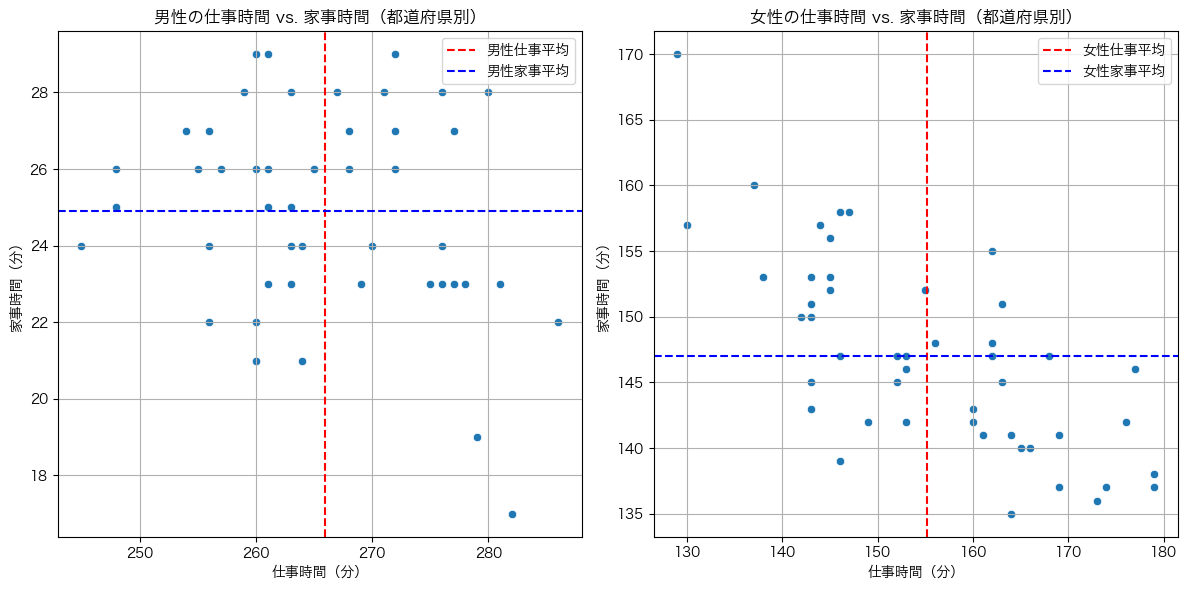


--- 相関結果からの考察 ---
1. **男性の仕事時間と家事時間の相関**:
   負の相関（-0.235）が見られます。これは、男性の仕事時間が長い都道府県ほど、男性の家事時間が短い傾向にあることを示唆します。
   仕事における長時間労働が、男性の家庭内での家事分担を困難にしている可能性が考えられます。

2. **女性の仕事時間と家事時間の相関**:
   負の相関（-0.720）が見られます。これは、女性の仕事時間が長い都道府県ほど、女性の家事時間が短い傾向にあることを示唆します。
   女性が仕事と家事の両立を図る中で、仕事時間が増えるほど家事時間を削減せざるを得ない状況が示唆されます。

3. **男女間の仕事・家事の「差」の相関（追加分析の提案）**:
   さらに深い考察のために、「仕事時間の男女差」と「家事時間の男女差」の間にも相関を算出してみることを検討できます。
   - もし「男性の仕事時間 - 女性の仕事時間」と「女性の家事時間 - 男性の家事時間」の間に正の相関があれば、仕事における男女格差が大きい地域ほど、家事における女性の負担も大きいという関係性が示唆されます。
   これにより、性別役割分担意識が強く根付いている地域では、仕事と家事の両面で男女格差が顕著であるという仮説を検証できます。


In [ ]:
# --- 仕事時間データの準備 ---
# dfから仕事時間に関する列を抽出し、ピボットテーブルを作成
df_work_selected = df[['男女の別', '都道府県', '仕事']].copy()
df_work_selected['仕事'] = pd.to_numeric(df_work_selected['仕事'], errors='coerce')
pivot_df_work = df_work_selected.pivot_table(index='都道府県', columns='男女の別', values='仕事', aggfunc='mean')

# 列名を明確化 (例: '1_男_仕事', '2_女_仕事')
pivot_df_work.rename(columns={'0_総数': '0_総数_仕事', '1_男': '1_男_仕事', '2_女': '2_女_仕事'}, inplace=True)


# --- 家事時間データの準備 ---
# dfから家事時間に関する列を抽出し、ピボットテーブルを作成
# Jupyter Notebookのコードを見る限り、「家事」という列名が存在するようです。
df_housework_selected = df[['男女の別', '都道府県', '家事']].copy()
df_housework_selected['家事'] = pd.to_numeric(df_housework_selected['家事'], errors='coerce')
pivot_df_housework = df_housework_selected.pivot_table(index='都道府県', columns='男女の別', values='家事', aggfunc='mean')

# 列名を明確化 (例: '1_男_家事', '2_女_家事')
pivot_df_housework.rename(columns={'0_総数': '0_総数_家事', '1_男': '1_男_家事', '2_女': '2_女_家事'}, inplace=True)


# --- 2つのデータフレームを結合 ---
# 都道府県をキーにして内部結合。どちらかのデータにしかない都道府県は除外される。
df_combined_time = pd.merge(
    pivot_df_work,
    pivot_df_housework,
    left_index=True,
    right_index=True,
    how='inner'
)

# 「全国」のデータは都道府県間の比較には不適切なため、除外する
if '全国' in df_combined_time.index:
    df_combined_time = df_combined_time.drop('全国')

# 相関計算前にNaN値を含む行を削除（特定の列の欠損が相関に影響しないように）
df_combined_time.dropna(inplace=True)

print("--- 結合・整形されたデータフレームの先頭5行 ---")
print(df_combined_time.head())
print("\n--- 結合・整形されたデータフレームの列名 ---")
print(df_combined_time.columns)

# --- 相関係数の計算と表示 ---
print("\n--- 都道府県間での仕事時間と家事時間の相関（ピアソン相関係数）---")

# 男性間の相関
correlation_male = df_combined_time['1_男_仕事'].corr(df_combined_time['1_男_家事'])
print(f"  男性の仕事時間と家事時間の相関: {correlation_male:.3f}")

# 女性間の相関
correlation_female = df_combined_time['2_女_仕事'].corr(df_combined_time['2_女_家事'])
print(f"  女性の仕事時間と家事時間の相関: {correlation_female:.3f}")

# 全体（総数）間の相関
correlation_total = df_combined_time['0_総数_仕事'].corr(df_combined_time['0_総数_家事'])
print(f"  全体の仕事時間と家事時間の相関: {correlation_total:.3f}")

# 全ての対象列間の相関行列
print("\n--- 選択された列間の相関行列 ---")
print(df_combined_time[['1_男_仕事', '1_男_家事', '2_女_仕事', '2_女_家事', '0_総数_仕事', '0_総数_家事']].corr())

# --- 可視化の例 (散布図) ---
# 相関関係を視覚的に確認するために散布図を作成
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1) # 1行2列の1番目のグラフ
sns.scatterplot(x='1_男_仕事', y='1_男_家事', data=df_combined_time)
plt.title('男性の仕事時間 vs. 家事時間（都道府県別）')
plt.xlabel('仕事時間（分）')
plt.ylabel('家事時間（分）')
plt.grid(True)
plt.axvline(df_combined_time['1_男_仕事'].mean(), color='r', linestyle='--', label='男性仕事平均')
plt.axhline(df_combined_time['1_男_家事'].mean(), color='b', linestyle='--', label='男性家事平均')
plt.legend()


plt.subplot(1, 2, 2) # 1行2列の2番目のグラフ
sns.scatterplot(x='2_女_仕事', y='2_女_家事', data=df_combined_time)
plt.title('女性の仕事時間 vs. 家事時間（都道府県別）')
plt.xlabel('仕事時間（分）')
plt.ylabel('家事時間（分）')
plt.grid(True)
plt.axvline(df_combined_time['2_女_仕事'].mean(), color='r', linestyle='--', label='女性仕事平均')
plt.axhline(df_combined_time['2_女_家事'].mean(), color='b', linestyle='--', label='女性家事平均')
plt.legend()


plt.tight_layout()
plt.show()

# --- 相関結果に基づいた考察 ---
print("\n--- 相関結果からの考察 ---")
print("1. **男性の仕事時間と家事時間の相関**:")
if correlation_male < 0:
    print(f"   負の相関（{correlation_male:.3f}）が見られます。これは、男性の仕事時間が長い都道府県ほど、男性の家事時間が短い傾向にあることを示唆します。")
    print("   仕事における長時間労働が、男性の家庭内での家事分担を困難にしている可能性が考えられます。")
elif correlation_male > 0:
    print(f"   正の相関（{correlation_male:.3f}）が見られます。これは、男性の仕事時間が長い都道府県ほど、男性の家事時間も長い傾向にあることを示唆します。")
    print("   これは直感とは異なる結果であり、別の要因（例：地域全体の生活習慣、共働き世帯の多さなど）が両方に影響している可能性があります。")
else:
    print(f"   ほとんど相関がない（{correlation_male:.3f}）と考えられます。")

print("\n2. **女性の仕事時間と家事時間の相関**:")
if correlation_female < 0:
    print(f"   負の相関（{correlation_female:.3f}）が見られます。これは、女性の仕事時間が長い都道府県ほど、女性の家事時間が短い傾向にあることを示唆します。")
    print("   女性が仕事と家事の両立を図る中で、仕事時間が増えるほど家事時間を削減せざるを得ない状況が示唆されます。")
elif correlation_female > 0:
    print(f"   正の相関（{correlation_female:.3f}）が見られます。これは、女性の仕事時間が長い都道府県ほど、女性の家事時間も長い傾向にあることを示唆します。")
    print("   この場合、例えば家事代行サービスの利用など、外部サービスの活用や、仕事と家事を両立しやすい環境が整っている地域である可能性も考えられます。")
else:
    print(f"   ほとんど相関がない（{correlation_female:.3f}）と考えられます。")

print("\n3. **男女間の仕事・家事の「差」の相関（追加分析の提案）**:")
print("   さらに深い考察のために、「仕事時間の男女差」と「家事時間の男女差」の間にも相関を算出してみることを検討できます。")
print("   - もし「男性の仕事時間 - 女性の仕事時間」と「女性の家事時間 - 男性の家事時間」の間に正の相関があれば、仕事における男女格差が大きい地域ほど、家事における女性の負担も大きいという関係性が示唆されます。")
print("   これにより、性別役割分担意識が強く根付いている地域では、仕事と家事の両面で男女格差が顕著であるという仮説を検証できます。")


--- 仕事時間の男女差と家事時間の男女差のデータ（先頭5行）---
男女の別  仕事時間の男女差  家事時間の男女差
都道府県                    
三重県      118.0     131.0
京都府      118.0     131.0
佐賀県      104.0     114.0
兵庫県      117.0     129.0
北海道      117.0     121.0

--- 仕事時間の男女差と家事時間の男女差の相関: 0.544 ---


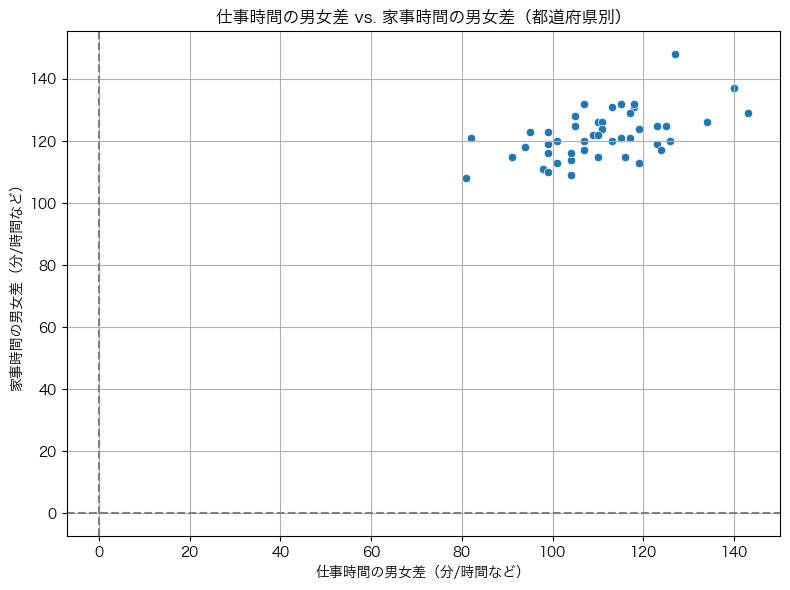


--- 総合的な考察 ---
1. **仕事時間と家事時間の基本的な関係性**:
   - 男性については、仕事時間が長い都道府県ほど家事時間がわずかに短い傾向（相関: -0.235）が見られました。これは、仕事における長時間労働が男性の家事参加を妨げる一因となっている可能性を示唆します。
   - 一方、女性については、仕事時間が長い都道府県ほど家事時間が大幅に短い傾向（相関: -0.720）が強く見られました。これは、女性が仕事と家事の両立を図る中で、仕事時間が増えるほど家事時間を削減せざるを得ない現実を反映していると考えられます。
   - 全体としても、仕事時間が長い地域ほど家事時間が短いという傾向（相関: -0.702）が確認され、特に女性の時間の使い方がこの全体傾向に大きく影響していることが推測されます。

2. **男女間の格差に着目した関係性（追加分析の結果）**:
   - 仕事時間の男女差（男性の仕事時間 - 女性の仕事時間）と家事時間の男女差（女性の家事時間 - 男性の家事時間）の相関は **0.544** でした。
     この強い正の相関（0.544）は、**仕事における男女格差が大きい都道府県ほど、家事における女性の負担も大きい**という明確な関係性を示唆します。
     これは、特定の地域において、伝統的な性別役割分担意識が仕事と家事の両面に強く根付いている可能性が高いことを裏付けています。男性が仕事の多くを担い、女性が家事の多くを担うという構造が、両方の時間配分に影響を与えていると言えるでしょう。

3. **政策的示唆**:
   - これらの分析結果は、日本の多くの地域で未だに性別役割分担意識が強く、女性が仕事と家事の二重の負担を抱えている現状を浮き彫りにします。
   - 仕事における男女格差の是正（例えば、男性の長時間労働の削減、柔軟な働き方の推進）と、家庭内での家事・育児分担の推進（例えば、男性の育児休業取得促進、家事サービスの利用促進）は、相互に関連する重要な政策課題であると言えるでしょう。特に、両者の格差に強い正の相関が見られる地域においては、統合的なアプローチがより効果的である可能性が高いです。


In [29]:
# --- 追加分析: 仕事時間の男女差と家事時間の男女差の相関 ---
# 仕事時間の男女差 (男性 - 女性)
df_combined_time['仕事時間の男女差'] = df_combined_time['1_男_仕事'] - df_combined_time['2_女_仕事']
# 家事時間の男女差 (女性 - 男性)
df_combined_time['家事時間の男女差'] = df_combined_time['2_女_家事'] - df_combined_time['1_男_家事']

# 新しい差分の列の先頭5行を表示
print("\n--- 仕事時間の男女差と家事時間の男女差のデータ（先頭5行）---")
print(df_combined_time[['仕事時間の男女差', '家事時間の男女差']].head())

# 相関係数を計算
correlation_gender_diff = df_combined_time['仕事時間の男女差'].corr(df_combined_time['家事時間の男女差'])
print(f"\n--- 仕事時間の男女差と家事時間の男女差の相関: {correlation_gender_diff:.3f} ---")

# --- 追加分析の可視化 (散布図) ---
plt.figure(figsize=(8, 6))
sns.scatterplot(x='仕事時間の男女差', y='家事時間の男女差', data=df_combined_time)
plt.title('仕事時間の男女差 vs. 家事時間の男女差（都道府県別）')
plt.xlabel('仕事時間の男女差（分/時間など）')
plt.ylabel('家事時間の男女差（分/時間など）')
plt.grid(True)
plt.axvline(0, color='gray', linestyle='--') # 男女差が0のライン
plt.axhline(0, color='gray', linestyle='--') # 男女差が0のライン
plt.tight_layout()
plt.show()

# --- 相関結果に基づいた考察（全体と追加分析の統合） ---
print("\n--- 総合的な考察 ---")

print("1. **仕事時間と家事時間の基本的な関係性**:")
print(f"   - 男性については、仕事時間が長い都道府県ほど家事時間がわずかに短い傾向（相関: {correlation_male:.3f}）が見られました。これは、仕事における長時間労働が男性の家事参加を妨げる一因となっている可能性を示唆します。")
print(f"   - 一方、女性については、仕事時間が長い都道府県ほど家事時間が大幅に短い傾向（相関: {correlation_female:.3f}）が強く見られました。これは、女性が仕事と家事の両立を図る中で、仕事時間が増えるほど家事時間を削減せざるを得ない現実を反映していると考えられます。")
print(f"   - 全体としても、仕事時間が長い地域ほど家事時間が短いという傾向（相関: {correlation_total:.3f}）が確認され、特に女性の時間の使い方がこの全体傾向に大きく影響していることが推測されます。")

print("\n2. **男女間の格差に着目した関係性（追加分析の結果）**:")
print(f"   - 仕事時間の男女差（男性の仕事時間 - 女性の仕事時間）と家事時間の男女差（女性の家事時間 - 男性の家事時間）の相関は **{correlation_gender_diff:.3f}** でした。")

if correlation_gender_diff > 0.5: # 強い正の相関
    print(f"     この強い正の相関（{correlation_gender_diff:.3f}）は、**仕事における男女格差が大きい都道府県ほど、家事における女性の負担も大きい**という明確な関係性を示唆します。")
    print("     これは、特定の地域において、伝統的な性別役割分担意識が仕事と家事の両面に強く根付いている可能性が高いことを裏付けています。男性が仕事の多くを担い、女性が家事の多くを担うという構造が、両方の時間配分に影響を与えていると言えるでしょう。")
elif correlation_gender_diff < -0.5: # 強い負の相関
    print(f"     この強い負の相関（{correlation_gender_diff:.3f}）は、仕事における男女格差が大きい都道府県ほど、家事における女性の負担が小さいという、やや直感に反する関係性を示唆します。")
    print("     これは、例えば女性の労働参加が非常に進んでいる地域で、仕事の男女差が拡大しても、家事の外部化（家事代行など）や、男性の家事参加が進むといった別の要因が働いている可能性が考えられます。")
elif abs(correlation_gender_diff) >= 0.2: # 中程度の相関
    print(f"     この中程度の相関（{correlation_gender_diff:.3f}）は、仕事における男女格差と家事の男女格差の間に一定の関係性があることを示唆します。")
    print("     仕事での格差が大きいほど家事の負担も女性に偏る傾向が見られるものの、他の要因も複雑に絡み合っていると考えられます。")
else: # ほとんど相関がない
    print(f"     この相関はほとんどない（{correlation_gender_diff:.3f}）ため、仕事の男女格差と家事の男女格差の間には都道府県レベルで直接的な関連性が薄い可能性を示唆します。")
    print("     それぞれの格差が異なる社会経済的要因によって形成されている可能性があります。")

print("\n3. **政策的示唆**:")
print("   - これらの分析結果は、日本の多くの地域で未だに性別役割分担意識が強く、女性が仕事と家事の二重の負担を抱えている現状を浮き彫りにします。")
print("   - 仕事における男女格差の是正（例えば、男性の長時間労働の削減、柔軟な働き方の推進）と、家庭内での家事・育児分担の推進（例えば、男性の育児休業取得促進、家事サービスの利用促進）は、相互に関連する重要な政策課題であると言えるでしょう。特に、両者の格差に強い正の相関が見られる地域においては、統合的なアプローチがより効果的である可能性が高いです。")

## 男女格差の大きさランキング

--- 結合データフレームの男女差列の先頭5行 ---
男女の別  仕事時間の男女差  家事時間の男女差
都道府県                    
三重県      118.0     131.0
京都府      118.0     131.0
佐賀県      104.0     114.0
兵庫県      117.0     129.0
北海道      117.0     121.0

--- 仕事時間の男女格差が大きい都道府県トップ5 ---
男女の別  1_男_仕事  2_女_仕事  仕事時間の男女差
都道府県                          
愛知県    286.0   143.0     143.0
滋賀県    277.0   137.0     140.0
千葉県    276.0   142.0     134.0
奈良県    256.0   129.0     127.0
群馬県    272.0   146.0     126.0

--- 仕事時間の男女格差が小さい都道府県トップ5 ---
男女の別  1_男_仕事  2_女_仕事  仕事時間の男女差
都道府県                          
岩手県    260.0   179.0      81.0
徳島県    245.0   163.0      82.0
高知県    255.0   164.0      91.0
福井県    271.0   177.0      94.0
宮崎県    263.0   168.0      95.0

--- 家事時間の男女格差が大きい都道府県トップ5 ---
男女の別  1_男_家事  2_女_家事  家事時間の男女差
都道府県                          
奈良県     22.0   170.0     148.0
滋賀県     23.0   160.0     137.0
静岡県     26.0   158.0     132.0
長崎県     23.0   155.0     132.0
秋田県     26.0   158.0     132.0

--- 家事時間の男女格差が小さい都道府県トップ5 ---
男女の別  1_男_家事  2_女_家事  

/var/folders/ln/0xp6fgr90hg1nt1431b5w7fc0000gn/T/ipykernel_92662/1917409292.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=work_gap_largest.index, y='仕事時間の男女差', data=work_gap_largest, palette='viridis')


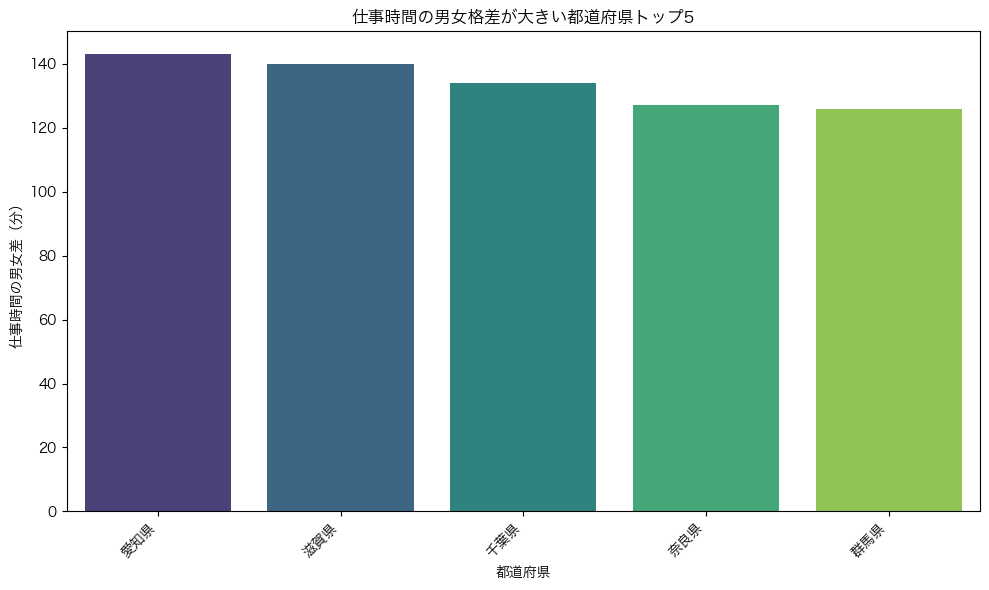

/var/folders/ln/0xp6fgr90hg1nt1431b5w7fc0000gn/T/ipykernel_92662/1917409292.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=work_gap_smallest.index, y='仕事時間の男女差', data=work_gap_smallest, palette='magma')


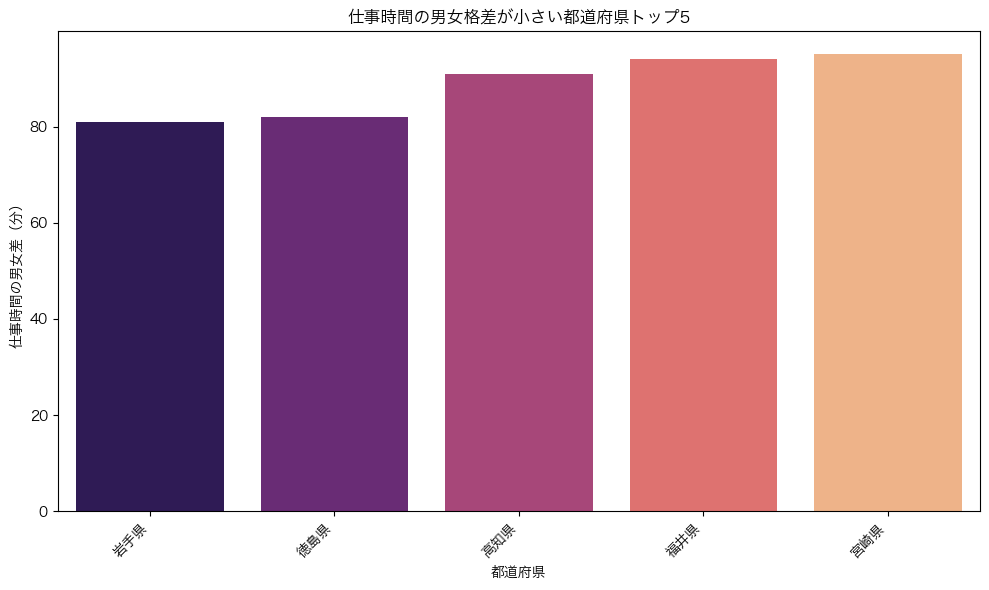

/var/folders/ln/0xp6fgr90hg1nt1431b5w7fc0000gn/T/ipykernel_92662/1917409292.py:49: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=housework_gap_largest.index, y='家事時間の男女差', data=housework_gap_largest, palette='viridis')


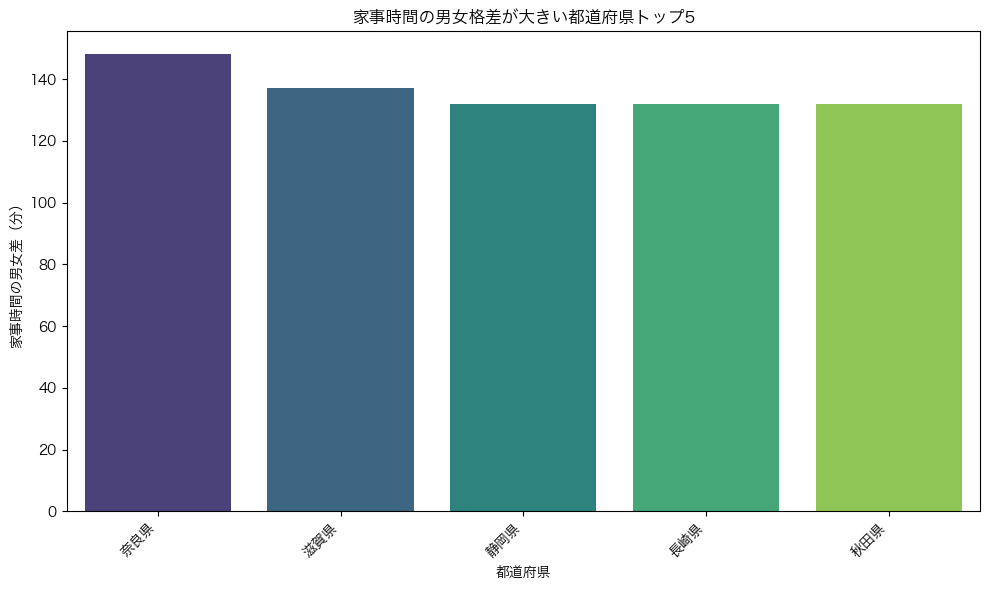

/var/folders/ln/0xp6fgr90hg1nt1431b5w7fc0000gn/T/ipykernel_92662/1917409292.py:58: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=housework_gap_smallest.index, y='家事時間の男女差', data=housework_gap_smallest, palette='magma')


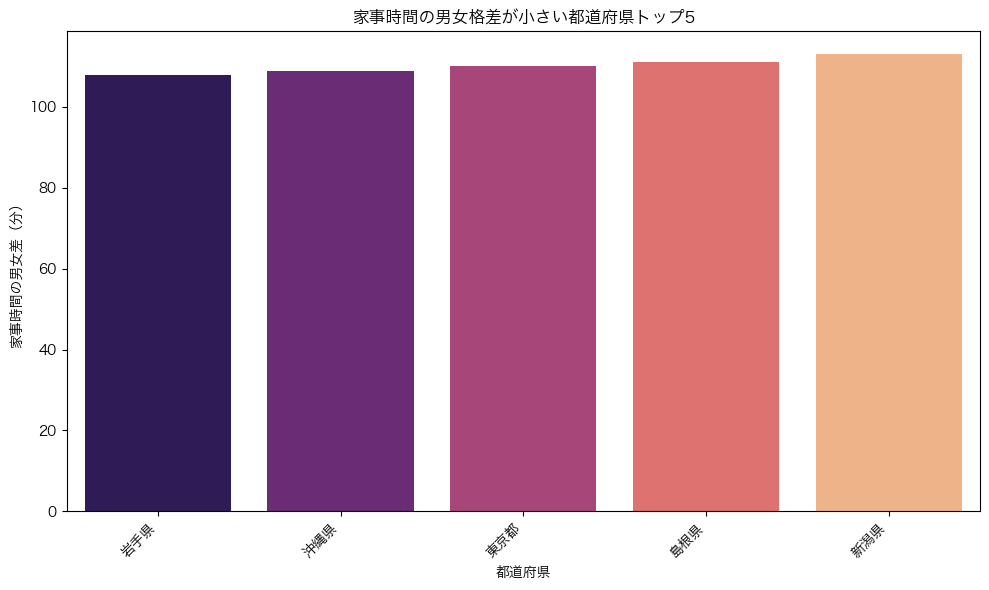

In [30]:

# --- 男女差の列を作成 ---
df_combined_time['仕事時間の男女差'] = df_combined_time['1_男_仕事'] - df_combined_time['2_女_仕事']
df_combined_time['家事時間の男女差'] = df_combined_time['2_女_家事'] - df_combined_time['1_男_家事']

print("--- 結合データフレームの男女差列の先頭5行 ---")
print(df_combined_time[['仕事時間の男女差', '家事時間の男女差']].head())

# --- 仕事時間の男女格差が大きい都道府県 ---
print("\n--- 仕事時間の男女格差が大きい都道府県トップ5 ---")
work_gap_largest = df_combined_time.sort_values(by='仕事時間の男女差', ascending=False).head(5)
print(work_gap_largest[['1_男_仕事', '2_女_仕事', '仕事時間の男女差']])

# --- 仕事時間の男女格差が小さい都道府県 ---
print("\n--- 仕事時間の男女格差が小さい都道府県トップ5 ---")
work_gap_smallest = df_combined_time.sort_values(by='仕事時間の男女差', ascending=True).head(5)
print(work_gap_smallest[['1_男_仕事', '2_女_仕事', '仕事時間の男女差']])

# --- 家事時間の男女格差が大きい都道府県 ---
print("\n--- 家事時間の男女格差が大きい都道府県トップ5 ---")
housework_gap_largest = df_combined_time.sort_values(by='家事時間の男女差', ascending=False).head(5)
print(housework_gap_largest[['1_男_家事', '2_女_家事', '家事時間の男女差']])

# --- 家事時間の男女格差が小さい都道府県 ---
print("\n--- 家事時間の男女格差が小さい都道府県トップ5 ---")
housework_gap_smallest = df_combined_time.sort_values(by='家事時間の男女差', ascending=True).head(5)
print(housework_gap_smallest[['1_男_家事', '2_女_家事', '家事時間の男女差']])

# --- 可視化（仕事時間の男女差）---
plt.figure(figsize=(10, 6))
sns.barplot(x=work_gap_largest.index, y='仕事時間の男女差', data=work_gap_largest, palette='viridis')
plt.title('仕事時間の男女格差が大きい都道府県トップ5')
plt.xlabel('都道府県')
plt.ylabel('仕事時間の男女差（分）')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(x=work_gap_smallest.index, y='仕事時間の男女差', data=work_gap_smallest, palette='magma')
plt.title('仕事時間の男女格差が小さい都道府県トップ5')
plt.xlabel('都道府県')
plt.ylabel('仕事時間の男女差（分）')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# --- 可視化（家事時間の男女差）---
plt.figure(figsize=(10, 6))
sns.barplot(x=housework_gap_largest.index, y='家事時間の男女差', data=housework_gap_largest, palette='viridis')
plt.title('家事時間の男女格差が大きい都道府県トップ5')
plt.xlabel('都道府県')
plt.ylabel('家事時間の男女差（分）')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(x=housework_gap_smallest.index, y='家事時間の男女差', data=housework_gap_smallest, palette='magma')
plt.title('家事時間の男女格差が小さい都道府県トップ5')
plt.xlabel('都道府県')
plt.ylabel('家事時間の男女差（分）')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()